# INTRODUCTION 

On this project we created a regresssion algorithm that predicts how much kilogram of Golden Delicious Aplles will cost,
Challenged by [**EXPLORE Data Science Academy**](https://explore-datascience.net/). The data used here is from Durban Fresh Produce Market but can be obtained [here](https://www.kaggle.com/c/edsa-apple-prices-challenge/data).

In this notebook we predicted the Target numeric variable which is Avarage Price using the predictors (Stock on hand, High Price, Low Price, Total Qty Sold, etc). below is the work flow
1. Exploratory data analysis, Data cleaning and formatting
2. Feature engineering and variable selection
3. Build the model using selected features
4. Evaluate the best model on testing set

___________________________________________________________________________________________________________________________

Firstly we imported the needed libraries and data.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor, FeaturesData, Pool

# Model slection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Other
from scipy import stats
import math
import pickle

Data was downloaded from the given link above

In [2]:
#Import Data
train_df = pd.read_csv('df-train_set.csv')
test_df = pd.read_csv('df-test_set.csv')

test_ID = test_df['Index']
test_df = test_df.drop('Index', axis=1)

# Exploratory Data Analysis (EDA)

We will only use dataset that falls under APPLE GOLDEN DELICIOUS Commodities

In [3]:
train_df = train_df[(train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS')] #create new df focusing on 'APPLE GOLDEN DELICIOUS

In [4]:
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [5]:
test_df.head() #Check the test set

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
print('We have {} training rows and {} trianing columns.'.format(train_df.shape[0], train_df.shape[1]))

We have 1952 training rows and 13 trianing columns.


From the above dataframe we can't tell which columns has null values, so we will use the Pandas library (info) to help check how many null values, the datatype and the columns name for those dataframe

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


We will check the shape of our data

In [8]:
train_df.shape, test_df.shape

((1952, 13), (685, 12))

Table for summary statistics for our data (Mean, min, Max, Std, count, etc)

In [9]:
# Exploring the spread of numeric variables within the dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,1952.0,40.460912,99.655169,3.00,9.00,12.00,18.300,400.00
Low_Price,1952.0,174.307377,373.553578,2.00,50.00,80.00,127.250,2300.00
High_Price,1952.0,215.648053,433.546159,5.00,60.00,108.00,160.000,3300.00
Sales_Total,1952.0,20053.533811,39005.069445,5.00,1325.00,5495.00,21082.500,369464.00
Total_Qty_Sold,1952.0,174.510758,308.810797,1.00,12.00,64.00,200.000,4237.00
Total_Kg_Sold,1952.0,2960.176332,6097.416527,3.00,219.60,853.50,3093.525,74000.00
Stock_On_Hand,1952.0,408.393955,724.450582,0.00,9.00,126.50,468.000,6400.00
avg_price_per_kg,1952.0,6.778893,2.248744,0.25,5.46,6.67,8.280,21.24


## 1 Future Selection 

Feature selection will help us choose the most relevant variable, in this project we have used Correlection to help use select features that are highly correleted to the target variable(have a relationship with the target), help with removing variables looking at their relationship with the target.
But before we do that we check the distribution of our target variable.

We will look at the distribution of our target variable which is the Avarage Price Per KG

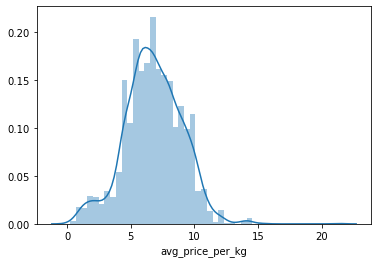

In [10]:
# target variable distribution
sns.distplot(train_df['avg_price_per_kg'],kde=True)

Our target variable is symmetrical distributed 

_______________________________________________________________________________________________________________

In [11]:
# Looking at the skewnwss or symmetry of our dataest
train_df.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

Secondly we will check for outliers

In [12]:
# Checking for outliers in our dataset.
train_df.kurtosis() #method for checking outliers

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

The Kurtosis method help us determine the outliers, any value higher than 3 is an outlier, all our above numeric independent variables have large number of outliers

________________________________________________________________________________________________________________________

### Outliers Treatment

Firstly we checked for outliers in our numeric training dataset., we used graphs to help us detect outliers, then we used the z-score method to remove outliers.
The outliers influence the shapeor the slope of the line, the treatment of outliers is very important and ahould be done.


We used Histogram to check for outliers

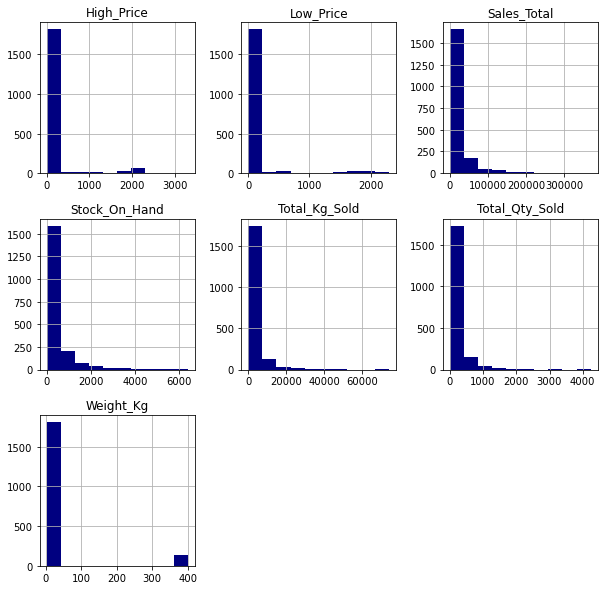

In [13]:
df = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand'] #list of numeric variables
train_df[df].hist(figsize=(10,10), color = 'navy'); #assign the list to the dataframe and plot a histogram with 10,10 figure size

From the above graphs you can see that all our plotted figures has outliers, beside the plots, we also saw with Kurtosis method above that we have too much outliers in our numeric dataset.

--------------------------------------------------------------------

Here we will use the Z-score method to remove outliers from our dataset.

In [14]:
#calculate z
threshold = 3 #used the threshold of 3
lowPrice_z = np.abs(stats.zscore(train_df.Low_Price))
lowPrice_abs_z_scores = np.abs(lowPrice_z)
df1 = train_df[lowPrice_abs_z_scores < threshold]

highPrice_z = np.abs(stats.zscore(df1.High_Price))
highPrice_abs_z_scores = np.abs(highPrice_z)                                
df2 = df1[highPrice_abs_z_scores < threshold]

weight_z = np.abs(stats.zscore(df2.Weight_Kg))
weight_abs_z_scores = np.abs(weight_z) 
df3 = df2[weight_abs_z_scores < threshold]

salesTotal_z = np.abs(stats.zscore(df3.Sales_Total))
salesTotal_abs_z_scores = np.abs(salesTotal_z) 
df4 = df3[salesTotal_abs_z_scores < threshold]

totalQtySold_z = np.abs(stats.zscore(df4.Total_Qty_Sold))
totalQtySold_abs_z_scores = np.abs(totalQtySold_z) 
df5 = df4[totalQtySold_abs_z_scores < threshold]

totalKgSold_z = np.abs(stats.zscore(df5.Total_Kg_Sold))
totalKgSold_abs_z_scores = np.abs(totalKgSold_z)
df6 = df5[totalKgSold_abs_z_scores < threshold]

stockOnHand_z = np.abs(stats.zscore(df6.Stock_On_Hand))
stockOnHand_abs_z_scores = np.abs(stockOnHand_z)
df7 = df6[stockOnHand_abs_z_scores < threshold]

avgPricePerKg_z = np.abs(stats.zscore(df7.avg_price_per_kg))
avgPricePerKg_abs_z_scores = np.abs(avgPricePerKg_z)
trainData_df = df7[avgPricePerKg_abs_z_scores < threshold]

After the Z_score method

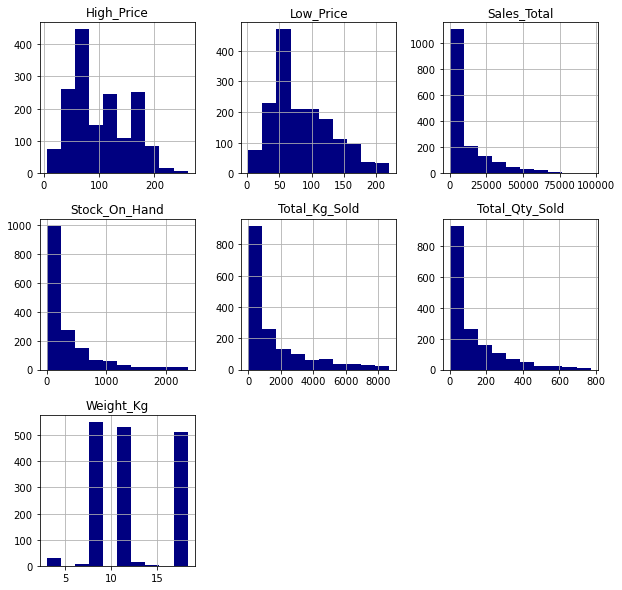

In [15]:
df = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand'] #list of numeric variables
trainData_df[df].hist(figsize=(10,10), color = 'navy'); #assign the list to the dataframe and plot a histogram with 10,10 figure size

____________________________________________________________________________________________________________________________

Now that we have removed outliers we used scatter plots to check for obvious relationships with the target variable, we check for linearity between the predictor variable and the target variable. The scatter plot that shows no linear relationship betwen the predictor variable and the target variable will be of no use as the model will be unappropiate.

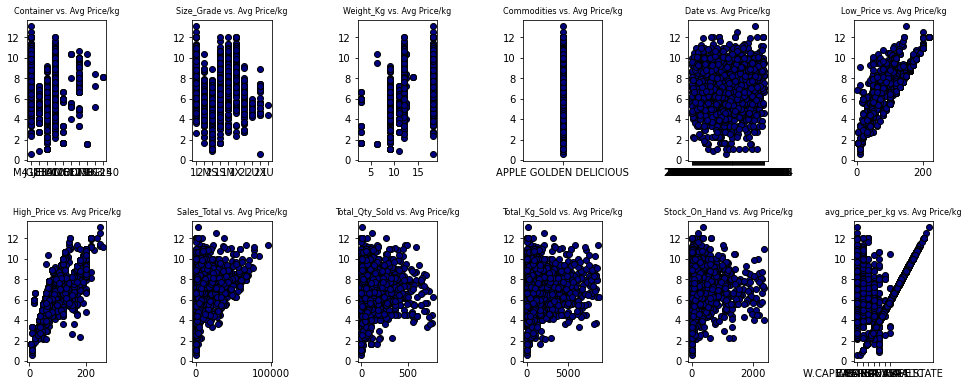

In [16]:
fig, ax = plt.subplots(2,6, figsize=(14,6),)#plot fig
fig.subplots_adjust(hspace = 0.5, wspace=.2) #plot weight and height space
ax = ax.ravel()

for i, column in enumerate(trainData_df.columns): #looping over the columns of traindata_df dataset
    ax[i-1].set_title("{} vs. Avg Price/kg".format(column),fontsize=8) #set title
    ax[i-1].scatter(x=trainData_df[column],y=trainData_df['avg_price_per_kg'],color='navy',edgecolor='k') #plot type & variables

fig.tight_layout(pad=3)

From the above scatter plot figures, we can conclude that Commodities has no relationship with the target variable, so we will remove it from our dataset. But atleast half of our plots shows a bit of relationship that we will explore further.

In [17]:
trainData_df.shape, test_df.shape

((1643, 13), (685, 12))

## 2 Dummy Variables

### Preprocessing

In [18]:
#For The TRAIN DATA (Train_df)
train_df_d = pd.get_dummies(trainData_df) #dummy variable

train_df_d.columns = [col.replace(" ","_") for col in train_df_d.columns] #replacing space with -
#train_df_d.drop(['Commodities_APPLE_GOLDEN_DELICIOUS'], axis= 1, inplace =True) #removing Commodities

train_df_d.head() 

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN_CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#For The Test DATA (Test_df)
#using the test data
test_df = test_df[(test_df['Commodities'] == 'APPLE GOLDEN DELICIOUS')]

X_t = pd.get_dummies(test_df)
X_t.columns = [col.replace(" ","_") for col in X_t.columns]
X_t.drop(['Commodities_APPLE_GOLDEN_DELICIOUS'], axis= 1, inplace =True)

X_t.head()



,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-09-03,Date_2020-09-07,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_df_d.shape, X_t.shape

((1643, 183), (685, 179))

# 2.3 Correlation and Variable selection

1. Check the independent variables that are highly correleted to the target variable
2. Check those that have moderate correlection
3. Check the weak correlected independent variables
4. Chose variables to remove depending on their relationship with the target variable

we will arrange the data so our target variable be the last column on the dataframe

In [21]:
#Avarage must be the last column (dependent)
#reorder columns
column_titles = [col for col in train_df_d.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_df_d=train_df_d.reindex(columns=column_titles)

The correlection

In [22]:
# Target correlations with features
corrs = pd.DataFrame(train_df_d.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Low_Price,0.818317
High_Price,0.765937
Weight_Kg,0.492557
Container_M4183,0.380769
...,...
Province_EASTERN_CAPE,-0.229628
Province_NATAL,-0.337509
Size_Grade_2S,-0.409072
Container_JE090,-0.429679


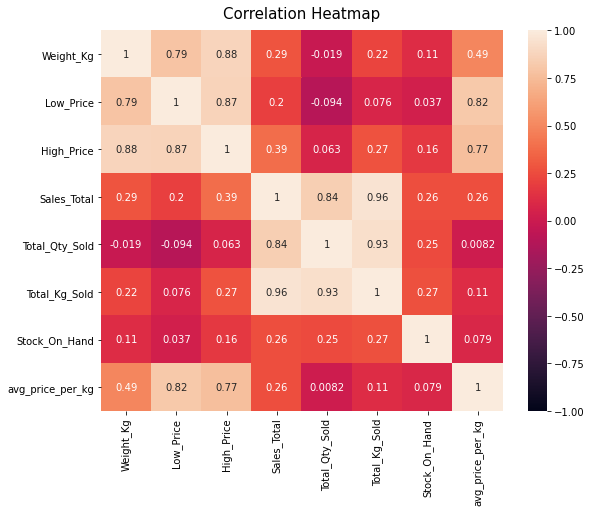

In [23]:
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(trainData_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

In [24]:
df_num_corr = train_df.corr()['avg_price_per_kg'][:-1] # -1 because the latest row is Average price per kg
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with Average price per kg:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with Average price per kg:
Sales_Total       0.108473
Stock_On_Hand     0.105028
Total_Qty_Sold    0.087536
Low_Price        -0.141740
High_Price       -0.164496
Weight_Kg        -0.337886
Name: avg_price_per_kg, dtype: float64


### Train & Test Split

For Train Data (Train_df thats in df_dummies)

In [25]:
#spliting variables into x and y
X = train_df_d[['Sales_Total', 'Low_Price', 'High_Price','Stock_On_Hand','Weight_Kg']].values
Y = train_df_d['avg_price_per_kg']



For Test Data (Test_df thats in X_t dummies)

In [26]:
X_real = X_t[['Sales_Total', 'Low_Price', 'High_Price', 'Stock_On_Hand','Weight_Kg']].values

In [27]:
X_real.shape, X.shape #checking the data shape

((685, 5), (1643, 5))

In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

### MODELS

In [29]:
#Function for model prediction
def model_test(model, X, y):
    #Predict
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y_pred, y))
    print('R2 Score is : {} | Root Mean Square Error is : {}'
          .format(r2,rmse))
    
    return

#### Using The Linear Regression (Train and Test)

In [30]:
#Function for Linear Regression
def linearRegression(X, y):
    global Linear_model
    Linear_model = LinearRegression(n_jobs = -1)
    Linear_model.fit(X, y)
    return Linear_model
#fitting the model
linearRegression(X_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
#making predictions
model_test(Linear_model, X_train, y_train)
model_test(Linear_model, X_test, y_test)

R2 Score is : 0.850843194208749 | Root Mean Square Error is : 0.8144069459473636
R2 Score is : 0.8684538519892842 | Root Mean Square Error is : 0.7666980297870984


Prediction on the test dataset

In [32]:
test_linear = Linear_model.predict(X_real)
test_linear

array([   9.87433249,   13.08520595,    9.01202349,    8.91882098,
          8.31747314,  -53.56951095,    3.91876967,    7.40669574,
          8.39687748,    9.62125203,    5.55300752,   -9.26605034,
          8.28959666,    4.82679641,    5.23776033,    5.87884793,
          7.39578878,    5.19804001,   13.44586336,    5.96411816,
          5.7879559 ,  -43.69820354,    5.72119705,    6.9068686 ,
          5.52680742,    5.85166072,    8.00444808,    8.36415071,
          7.24456454,    8.66985738,    8.28572358,    5.71318264,
         10.3820039 ,    7.54924009,  -82.47056377,   10.30810298,
         11.73343115,   13.67262427,    6.04954517,    6.73222092,
          9.13342713,    6.5704246 ,    4.06720056,    6.04776672,
          5.53130706,    5.57296607,  -36.95135074,    5.53736031,
          5.89284506,  -85.93762319, -140.40344785,    6.06425816,
          5.9060321 ,   15.86597489,    8.40973297,    5.57159102,
         10.67533681,    9.66070335,    7.76303996,    5.68167

_____________________________________________________________________________________________________________________________

#### Using The Lasso Regression

In [33]:
#fitting the data using Lasso
def lasso_Regression(X, y):
    global Lasso_model
    Lasso_model = Lasso(alpha=0.01, random_state=42)
    Lasso_model.fit(X, y)
    return Lasso_model

lasso_Regression(X_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [34]:
model_test(Lasso_model, X_train, y_train)
model_test(Lasso_model, X_test, y_test)

R2 Score is : 0.8508357378607878 | Root Mean Square Error is : 0.8144273017925077
R2 Score is : 0.8683370452595577 | Root Mean Square Error is : 0.7670383499692838


Prediction on test set

In [35]:
test_lasso = Lasso_model.predict(X_real)
test_lasso

array([   9.86402776,   13.07530849,    9.00499433,    8.92230214,
          8.32186994,  -52.78564644,    3.92653171,    7.4119614 ,
          8.39788951,    9.62256549,    5.55057896,   -8.58276701,
          8.29177695,    4.8283666 ,    5.23770041,    5.87746504,
          7.39477013,    5.197683  ,   13.4313233 ,    5.96206988,
          5.78557094,  -42.90124203,    5.71866467,    6.90174013,
          5.52637269,    5.85122294,    8.00647561,    8.36941398,
          7.25115009,    8.68601756,    8.29013575,    5.7149397 ,
         10.37959079,    7.55732571,  -81.65973105,   10.30713861,
         11.72830999,   13.65837847,    6.05104621,    6.74094649,
          9.12647221,    6.57407148,    4.08635678,    6.04498518,
          5.53103273,    5.57083075,  -36.17819613,    5.53681749,
          5.89138001,  -85.16636033, -139.33103602,    6.06056758,
          5.91329844,   15.84720206,    8.40513607,    5.58113548,
         10.66292117,    9.6590669 ,    7.76637936,    5.68536

______________________________________________________________________________________________________________________________

#### Using Decision Tree

In [36]:
def decision_Tree(X,y):
    global dec_tree
    dec_tree = DecisionTreeRegressor(random_state=42)
    dec_tree.fit(X, y)
    return dec_tree

decision_Tree(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
model_test(dec_tree, X_train, y_train)
model_test(dec_tree, X_test, y_test)

R2 Score is : 1.0 | Root Mean Square Error is : 1.061040890862348e-15
R2 Score is : 0.8915783184937655 | Root Mean Square Error is : 0.6960546654282533


Prediction on test set

In [38]:
test_decTree = dec_tree.predict(X_real)
test_decTree

array([10.82, 12.02, 10.  ,  8.74,  8.69, 11.27,  3.64,  7.26,  9.26,
        9.29,  5.45, 12.02,  7.75,  4.44,  4.54,  6.11,  7.2 ,  4.57,
       10.73,  6.19,  5.02, 11.14,  5.23,  7.78,  5.56,  6.91,  6.67,
        7.97,  7.89,  7.37,  7.71,  5.57, 10.08,  7.65, 11.14,  9.84,
       10.93, 11.96,  6.36,  7.04,  7.82,  9.44,  4.92,  6.24,  5.56,
        5.02, 11.96,  5.56,  6.11, 11.14, 12.02,  6.24,  6.23, 11.25,
        8.02,  7.26, 12.  ,  9.13,  6.32,  6.  ,  7.39, 11.14,  6.24,
        9.37,  7.01,  6.22,  7.22,  4.33, 11.14,  7.1 ,  5.46,  4.46,
        2.9 ,  8.  ,  6.73,  4.64,  6.11,  9.34, 10.93,  6.24,  6.23,
       11.96,  5.9 ,  5.56,  1.11,  5.96,  7.52, 11.23,  5.32,  7.12,
        9.38,  9.76,  7.28,  6.27,  6.  ,  5.69,  8.28,  8.9 ,  6.91,
        5.56, 10.93,  6.42,  6.  ,  7.65,  7.23,  8.74,  7.73,  2.73,
       10.  , 11.14,  4.22,  7.82,  6.11,  4.24,  7.72, 10.  ,  5.33,
        9.31,  4.44,  5.96,  5.93,  4.17,  9.97, 11.96,  9.29,  7.25,
        4.59,  9.15,

______________________________________________________________________________________________________________________________

#### Using Random Forest 

In [39]:
def random_Forest(X,y):
    global rand_forest
    rand_forest = RandomForestRegressor(n_estimators=350, max_depth=450, random_state=3)
    rand_forest.fit(X, y)
    return dec_tree

random_Forest(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
model_test(rand_forest, X_train, y_train)
model_test(rand_forest, X_test, y_test)

R2 Score is : 0.9906235500848205 | Root Mean Square Error is : 0.20419220123728504
R2 Score is : 0.9252025163076638 | Root Mean Square Error is : 0.578134349388235


Prediction on test set

In [41]:
test_randForest= rand_forest.predict(X_real)
test_randForest

array([10.75105714, 11.87545714, 10.        ,  8.74045714,  8.39197143,
       11.58862857,  3.63951429,  7.41962857,  9.12265714,  9.29568571,
        5.48828571, 11.8196    ,  8.73362857,  4.41777143,  4.54822857,
        6.10974286,  7.63371429,  4.52025714, 10.72928571,  6.0172    ,
        5.32554286, 11.48554286,  5.33674286,  7.7832    ,  5.56      ,
        6.49922857,  7.70394286,  7.91362857,  7.2572    ,  7.26897143,
        7.9188    ,  5.58425714,  9.91511429,  7.65      , 11.46242857,
        9.83945714, 10.93085714, 11.43911429,  6.33394286,  6.68754286,
        7.70631429,  8.38582857,  5.16868571,  6.2764    ,  5.56      ,
        5.26745714, 11.69654286,  5.56317143,  6.10294286, 11.47308571,
       11.84054286,  6.2416    ,  6.00654286, 11.69325714,  8.2762    ,
        5.53965714, 11.65617143,  9.04062857,  7.41171429,  5.99491429,
        7.83957143, 11.37554286,  6.34502857,  9.19162857,  6.17925714,
        6.14794286,  6.94405714,  5.215     , 11.48711429,  7.06

______________________________________________________________________________________________________________________________

.

Using AdaBoost and Catboost to combine models and evaluate results

In [42]:
# Instantiate Random forest regression model to use as the base model
d_tree = RandomForestRegressor(n_estimators=300, max_depth=100, random_state=3)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree, random_state= 10 )

In [43]:
#fitting
bst_reg.fit(X_train, y_train)
bst_reg.fit(X_test, y_test)
#predictions
model_test(bst_reg, X_train, y_train)
model_test(bst_reg, X_test, y_test)


R2 Score is : 0.9073229724796323 | Root Mean Square Error is : 0.6419570606494963
R2 Score is : 0.9958513158639279 | Root Mean Square Error is : 0.1361571539338874


In [44]:
#predictions on test set
test_ada = bst_reg.predict(X_real)
test_ada

array([10.63553333, 11.6709    ,  9.73796667,  8.736     ,  8.36563333,
       11.274     ,  3.6775    ,  7.6035    ,  8.51103333,  9.46183333,
        5.06643333, 11.58786667,  8.81806667,  4.36293333,  4.6828    ,
        6.01476667,  7.2975    ,  4.60246667, 10.3119    ,  5.94233333,
        5.84393333, 11.1593    ,  5.29426667,  8.3125    ,  5.5852    ,
        5.32363333,  8.0498    ,  8.07096667,  7.55303333,  7.14483333,
        8.04846667,  5.90626667, 10.0913    ,  7.7276    , 11.07243333,
        9.77946667, 10.79793333, 11.19383333,  6.3039    ,  7.1397    ,
        9.663     ,  7.02163333,  5.3786    ,  6.15353333,  5.57573333,
        5.37303333, 11.51423333,  5.33363333,  5.95936667, 11.15653333,
       11.6436    ,  6.44656667,  5.95053333, 11.49443333,  8.17893333,
        5.71916667, 11.38823333,  8.9551    ,  7.798     ,  6.63663333,
        6.99966667, 11.02136667,  6.07506667,  9.19986667,  5.9149    ,
        6.2318    ,  6.84916667,  5.06186667, 11.01623333,  7.31

In [45]:
#model 
model = CatBoostRegressor(iterations=100, learning_rate=1, depth=5)
# Fit model
model.fit( X_train, y_train)
model.fit( X_test, y_test)
#predictions
model_test(model, X_train, y_train)
model_test(model, X_test, y_test)


0:	learn: 1.2094935	total: 84.8ms	remaining: 8.39s
1:	learn: 0.8936441	total: 89.7ms	remaining: 4.39s
2:	learn: 0.7711009	total: 94.3ms	remaining: 3.05s
3:	learn: 0.7367450	total: 99.4ms	remaining: 2.38s
4:	learn: 0.6933981	total: 104ms	remaining: 1.98s
5:	learn: 0.6533304	total: 109ms	remaining: 1.71s
6:	learn: 0.6372212	total: 114ms	remaining: 1.51s
7:	learn: 0.6184967	total: 119ms	remaining: 1.37s
8:	learn: 0.5870304	total: 124ms	remaining: 1.25s
9:	learn: 0.5599821	total: 128ms	remaining: 1.15s
10:	learn: 0.5356112	total: 133ms	remaining: 1.08s
11:	learn: 0.5236973	total: 137ms	remaining: 1.01s
12:	learn: 0.5027766	total: 142ms	remaining: 950ms
13:	learn: 0.4987680	total: 147ms	remaining: 901ms
14:	learn: 0.4847830	total: 152ms	remaining: 861ms
15:	learn: 0.4680743	total: 156ms	remaining: 821ms
16:	learn: 0.4622429	total: 161ms	remaining: 785ms
17:	learn: 0.4395603	total: 165ms	remaining: 754ms
18:	learn: 0.4326185	total: 170ms	remaining: 725ms
19:	learn: 0.4268476	total: 174ms	rem

84:	learn: 0.0677521	total: 183ms	remaining: 32.3ms
85:	learn: 0.0649051	total: 185ms	remaining: 30.2ms
86:	learn: 0.0642107	total: 187ms	remaining: 28ms
87:	learn: 0.0628804	total: 190ms	remaining: 25.9ms
88:	learn: 0.0625165	total: 192ms	remaining: 23.8ms
89:	learn: 0.0611329	total: 195ms	remaining: 21.6ms
90:	learn: 0.0604828	total: 198ms	remaining: 19.5ms
91:	learn: 0.0589968	total: 200ms	remaining: 17.4ms
92:	learn: 0.0572829	total: 202ms	remaining: 15.2ms
93:	learn: 0.0564521	total: 204ms	remaining: 13ms
94:	learn: 0.0549106	total: 206ms	remaining: 10.9ms
95:	learn: 0.0539810	total: 209ms	remaining: 8.69ms
96:	learn: 0.0529537	total: 211ms	remaining: 6.51ms
97:	learn: 0.0525875	total: 212ms	remaining: 4.34ms
98:	learn: 0.0513803	total: 214ms	remaining: 2.17ms
99:	learn: 0.0509283	total: 216ms	remaining: 0us
R2 Score is : 0.8461256833335008 | Root Mean Square Error is : 0.827185666842778
R2 Score is : 0.9994195725157906 | Root Mean Square Error is : 0.05092830989530217


In [46]:
#predictions on test data
cat_boost = model.predict(X_real)
cat_boost

array([11.0060494 , 11.97346109, 10.2924812 ,  8.91961672,  8.62595358,
       11.25895834,  3.29778695,  6.9700372 ,  8.21514715,  9.38998023,
        4.16593826, 11.6243002 ,  8.78978123,  4.59193891,  4.57801355,
        6.2214742 ,  8.19407037,  4.06060652,  9.54491053,  5.68392083,
        4.6896627 , 10.59875005,  5.36454844,  7.71113219,  5.33065615,
        4.83152729,  8.13219965,  7.6612138 ,  7.46186098,  7.86117231,
        7.5152037 ,  5.67806047, 10.29426074,  7.55826187, 10.2792056 ,
        9.43218646, 10.99686915, 10.54305447,  6.21360558,  8.01935449,
        9.47486116,  4.85853597,  5.3543426 ,  6.3152442 ,  5.58914926,
        4.45818231, 11.36207755,  5.66055847,  6.38591195, 10.24064073,
       11.78499935,  6.4346394 ,  5.91495514, 11.30274818,  8.30284397,
        4.4275065 , 11.74019034,  9.77053569,  7.36131314,  6.23831476,
        6.40349702, 10.96717692,  6.38044655,  8.55036279,  5.2233551 ,
        5.86711725,  6.96221942,  5.44367085, 10.46623515,  7.75

.

FIGURES FOR MODELS

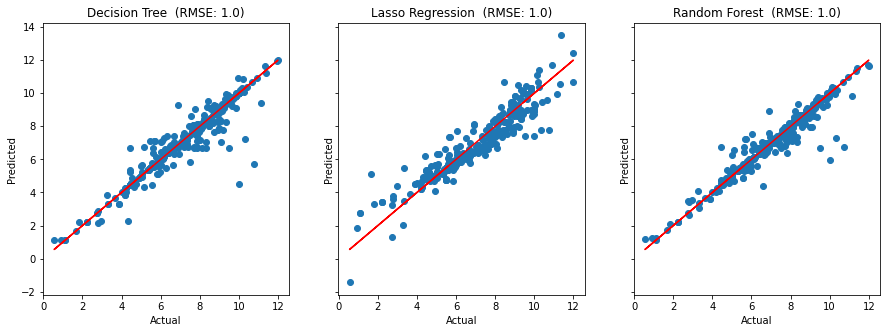

In [47]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [dec_tree.predict(X_test), Lasso_model.predict(X_test), rand_forest.predict(X_test)]
title = [ 'Decision Tree','Lasso Regression','Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

In [48]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': cat_boost
    })

submission.to_csv("Cat_B_Submissions.csv", index=False)